In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pickle

In [13]:
#loading preprocessed dataset from saved data folder
df = pd.read_pickle('saved_data/df_preprocessed.pkl')

In [3]:
#PCA
pca = PCA()
features = df.drop(columns='num')
target = df['num']
features_pca = pca.fit_transform(features)

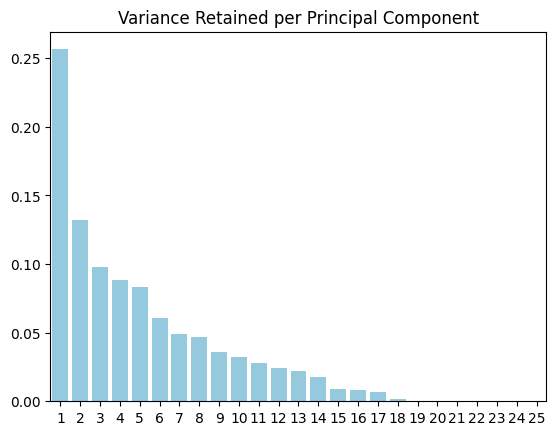

In [4]:
#plotting variance retained per component
components = np.arange(1, len(pca.explained_variance_ratio_) + 1)
sns.barplot(x=components, y=pca.explained_variance_ratio_, color='skyblue')
plt.title('Variance Retained per Principal Component')
plt.show()

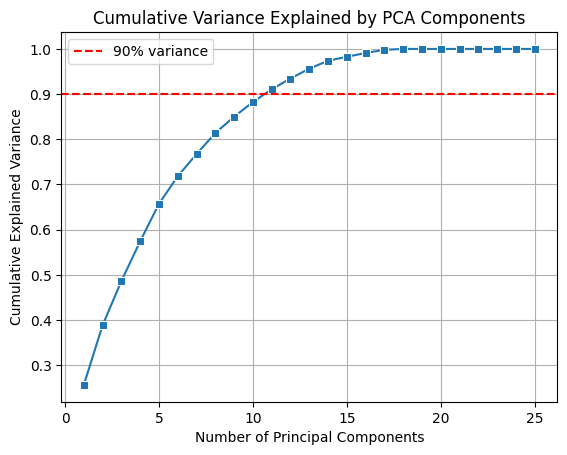

In [5]:
# Calculating Cumulative Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot Cumulative Variance
sns.lineplot(x=range(1, len(cumulative_variance) + 1), y=cumulative_variance, marker="s")
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA Components")
plt.legend()
plt.grid(True)
plt.show()
#from the plot 90% variance achieved with 11 PCA components

In [12]:
#optimal PCA with 90% variance
pca_optimal = PCA(n_components=11)
features_pca_optimal = pca_optimal.fit_transform(features)
#Getting it back to a dataframe
pca_columns = [f'PC{i+1}' for i in range(11)]
pca_df = pd.DataFrame(features_pca_optimal, columns=pca_columns, index=df.index)
pca_df['num'] = target

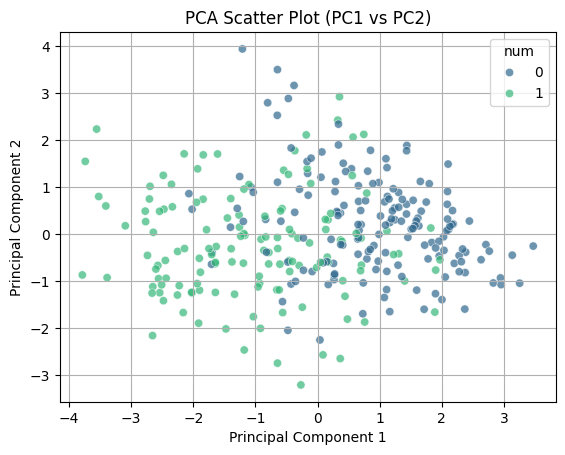

In [7]:
#Visualizing PCA result with scatter plot
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='num', palette='viridis', alpha=0.7)
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [8]:
#Saving PCA and dataframe with optimal PCA results
with open('saved_preprocessors/PCA.pkl', 'wb') as f:
    pickle.dump(pca_optimal, f)
with open('saved_data/df_PCA.pkl', 'wb') as f:
    pca_df.to_pickle(f)